**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

**Import ASTARR CPM**

In [3]:
ASSAY   = "KS91_K562_ASTARRseq"
REGION  = "WGS" 
TYPE    = "raw"
PROCESS = "cpm"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = paste("result", "Log2FC", TYPE, PROCESS, REGION, "tsv", sep=".")
fpath = file.path(fdiry, fname)
cat(fpath, "\n")

dat_log2fc_cpm = read_tsv(fpath)
head(dat_log2fc_cpm)

/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/KS91_K562_ASTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.cpm.WGS.tsv 


Rows: 246852 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Peak
dbl (5): Start, End, Input, Output, log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,Peak,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,0.4863317,0.09736537,-2.3204599
chr1,14253,14645,chr1_14253_14645,0.3152472,0.27902967,-0.1760648
chr1,16015,16477,chr1_16015_16477,0.4361424,0.15900628,-1.4557156
chr1,17237,17772,chr1_17237_17772,0.8007562,0.22194085,-1.8511878
chr1,28903,29613,chr1_28903_29613,0.7629703,0.16679463,-2.1935541
chr1,30803,31072,chr1_30803_31072,0.2774187,0.21678565,-0.3557958


In [4]:
sum(is.na(dat_log2fc_cpm$Input))
sum(is.na(dat_log2fc_cpm$Output))
sum(is.na(dat_log2fc_cpm$log2FoldChange))

[1] 0

[1] 0

[1] 0

**Import peak info**

In [5]:
ASSAY   = "KS91_K562_ASTARRseq"
REGION  = "WGS" 
TYPE    = "raw"
PROCESS = "cpm"
FOLDER  = "KS91_K562_ASTARRseq_peak_macs"

cnames = c("Chrom", "Start", "End", 
           "Pct_AT", "Pct_GC", 
           "Num_A", "Num_C", "Num_G", "Num_T", "Num_N", "Num_Other",
           "Length")
ctypes = c("ciiddiiiiiii")

fdiry = file.path(FD_RES, "region", FOLDER)
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"
fpath = file.path(fdiry, fname)
cat(fpath, "\n")

dat_peak_nuc = read_tsv(fpath, col_types = ctypes)
cnames_old   = colnames(dat_peak_nuc)
print(cbind(cnames_old, cnames))
colnames(dat_peak_nuc) = cnames

dat_peak_nuc = dat_peak_nuc %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))
head(dat_peak_nuc)

/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/region/KS91_K562_ASTARRseq_peak_macs/KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz 
      cnames_old   cnames     
 [1,] "#1_usercol" "Chrom"    
 [2,] "2_usercol"  "Start"    
 [3,] "3_usercol"  "End"      
 [4,] "4_pct_at"   "Pct_AT"   
 [5,] "5_pct_gc"   "Pct_GC"   
 [6,] "6_num_A"    "Num_A"    
 [7,] "7_num_C"    "Num_C"    
 [8,] "8_num_G"    "Num_G"    
 [9,] "9_num_T"    "Num_T"    
[10,] "10_num_N"   "Num_N"    
[11,] "11_num_oth" "Num_Other"
[12,] "12_seq_len" "Length"   


Chrom,Start,End,Pct_AT,Pct_GC,Num_A,Num_C,Num_G,Num_T,Num_N,Num_Other,Length,Peak
<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
chr1,10015,10442,0.477752,0.522248,141,223,0,63,0,0,427,chr1_10015_10442
chr1,14253,14645,0.426020,0.573980,75,124,101,92,0,0,392,chr1_14253_14645
chr1,16015,16477,0.458874,0.541126,102,124,126,110,0,0,462,chr1_16015_16477
chr1,17237,17772,0.385047,0.614953,94,182,147,112,0,0,535,chr1_17237_17772
chr1,28903,29613,0.240845,0.759155,85,303,236,86,0,0,710,chr1_28903_29613
chr1,30803,31072,0.498141,0.501859,47,84,51,87,0,0,269,chr1_30803_31072


**Combine**

In [6]:
dat_peak_full = dat_peak_nuc %>% 
    dplyr::select(Peak, Pct_GC, Length) %>% 
    dplyr::inner_join(dat_log2fc_cpm, by=c("Peak"))

head(dat_peak_full)

Peak,Pct_GC,Length,Chrom,Start,End,Input,Output,log2FoldChange
<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,0.522248,427,chr1,10015,10442,0.4863317,0.09736537,-2.3204599
chr1_14253_14645,0.573980,392,chr1,14253,14645,0.3152472,0.27902967,-0.1760648
chr1_16015_16477,0.541126,462,chr1,16015,16477,0.4361424,0.15900628,-1.4557156
chr1_17237_17772,0.614953,535,chr1,17237,17772,0.8007562,0.22194085,-1.8511878
chr1_28903_29613,0.759155,710,chr1,28903,29613,0.7629703,0.16679463,-2.1935541
chr1_30803_31072,0.501859,269,chr1,30803,31072,0.2774187,0.21678565,-0.3557958


## Explore correlations

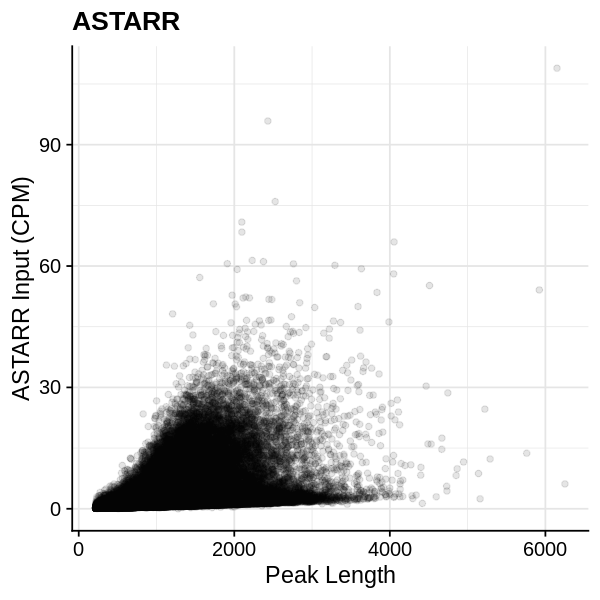

In [7]:
dat = dat_peak_full
gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

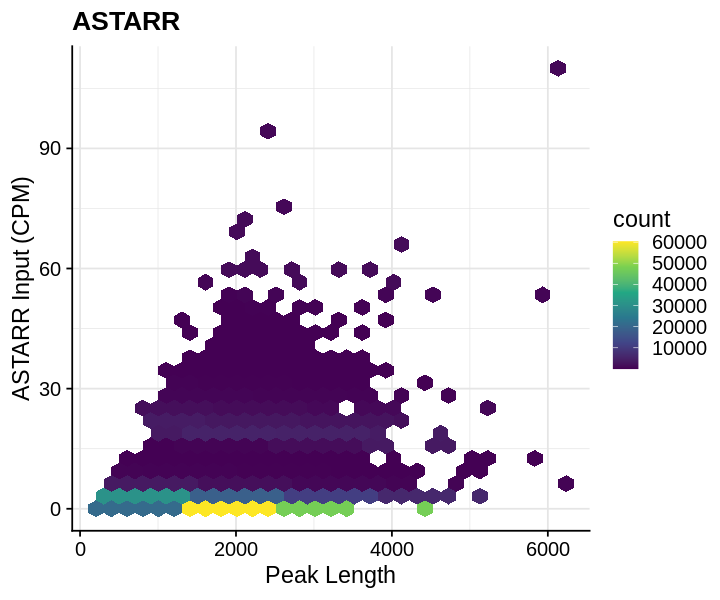

In [8]:
my_colors = colorRampPalette(rev(brewer.pal(11,'Spectral')))

set.seed(123)
dat = dat_peak_full #%>% dplyr::slice_sample(n = 100000)
gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_hex(bins=30) + 
    scale_fill_viridis_c() +
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

In [9]:
dat = dat_peak_full %>% dplyr::select(Input, Length, Pct_GC) %>% na.omit
pcor = cor(dat)
scor = cor(dat, method = "spearman")

print(dim(dat))
cat("++++++++++++++++\n")
cat("Pearson\n")
print(pcor)
cat("++++++++++++++++\n")
cat("Spearson\n")
print(scor)

[1] 246852      3
++++++++++++++++
Pearson
           Input    Length    Pct_GC
Input  1.0000000 0.5129637 0.2920130
Length 0.5129637 1.0000000 0.1750018
Pct_GC 0.2920130 0.1750018 1.0000000
++++++++++++++++
Spearson
           Input    Length    Pct_GC
Input  1.0000000 0.8482047 0.2011053
Length 0.8482047 1.0000000 0.1269191
Pct_GC 0.2011053 0.1269191 1.0000000


In [10]:
paletteLength <- 50
myColor = colorRampPalette(c("white", "#ffffbf", "#f46d43", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(
        0, 
        1, 
        length.out=floor(paletteLength))
)

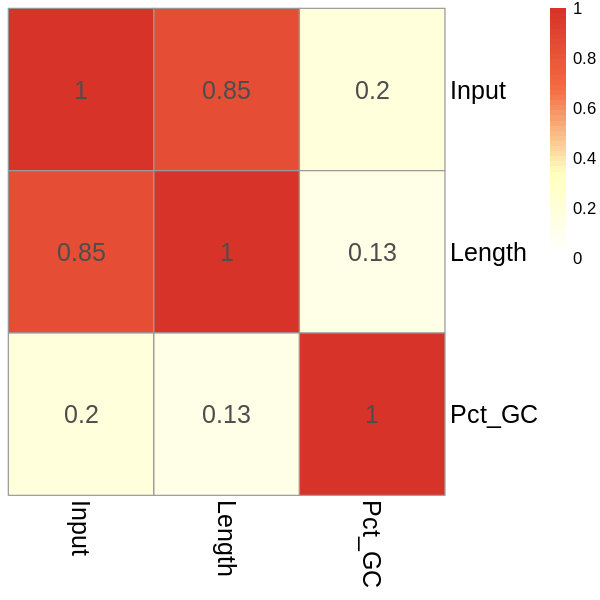

In [11]:
options(repr.plot.height=5, repr.plot.width=5)
mat = scor
pheatmap(mat, 
         color=myColor, breaks=myBreaks,
         display_numbers = round(mat,2), 
         fontsize_number=15, 
         fontsize_row = 15,
         fontsize_col = 15,
         cluster_rows = FALSE, cluster_cols = FALSE)

## Regress out the confounding factors

In [12]:
dat = dat_peak_full %>% dplyr::select(Peak, Input, Length, Pct_GC) %>% na.omit
#fit = lm(Input ~ Length + Pct_GC, data=dat)
fit = lm(Input ~ Length, data=dat)
res = residuals(fit)

fun = function(x){(x-min(x))/(max(x)-min(x))}
dat$Residual = res
dat$Score    = fun(res)
dat_chromatin_access = dat

print(summary(fit))
cat("++++++++++++++++++++++++\n")
print(dim(dat))
head(dat)


Call:
lm(formula = Input ~ Length, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.793  -0.954  -0.181   0.327  89.296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.209e+00  1.072e-02  -112.8   <2e-16 ***
Length       3.382e-03  1.139e-05   296.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.804 on 246850 degrees of freedom
Multiple R-squared:  0.2631,	Adjusted R-squared:  0.2631 
F-statistic: 8.815e+04 on 1 and 246850 DF,  p-value: < 2.2e-16

++++++++++++++++++++++++
[1] 246852      6


Peak,Input,Length,Pct_GC,Residual,Score
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,0.4863317,427,0.522248,0.25149985,0.1362392
chr1_14253_14645,0.3152472,392,0.573980,0.19879784,0.1357280
chr1_16015_16477,0.4361424,462,0.541126,0.08292808,0.1346040
chr1_17237_17772,0.8007562,535,0.614953,0.20062968,0.1357457
chr1_28903_29613,0.7629703,710,0.759155,-0.42906879,0.1296375
chr1_30803_31072,0.2774187,269,0.501859,0.57699942,0.1393966


In [13]:
tmp  = dat %>% dplyr::select(-Peak, -Residual)
pcor = cor(tmp)
scor = cor(tmp, method = "spearman")

print(pcor)
cat("++++++++++++++++\n")
print(scor)

           Input        Length    Pct_GC         Score
Input  1.0000000  5.129637e-01 0.2920130  8.584103e-01
Length 0.5129637  1.000000e+00 0.1750018 -7.216364e-17
Pct_GC 0.2920130  1.750018e-01 1.0000000  2.356023e-01
Score  0.8584103 -7.216364e-17 0.2356023  1.000000e+00
++++++++++++++++
            Input     Length    Pct_GC      Score
Input   1.0000000  0.8482047 0.2011053 -0.2179931
Length  0.8482047  1.0000000 0.1269191 -0.5806694
Pct_GC  0.2011053  0.1269191 1.0000000  0.1120790
Score  -0.2179931 -0.5806694 0.1120790  1.0000000


In [14]:
paletteLength <- 50
myColor = colorRampPalette(c("#e0f3f8", "white", "#ffffbf", "#f46d43", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(
        -0.1, 
        1, 
        length.out=floor(paletteLength))
)

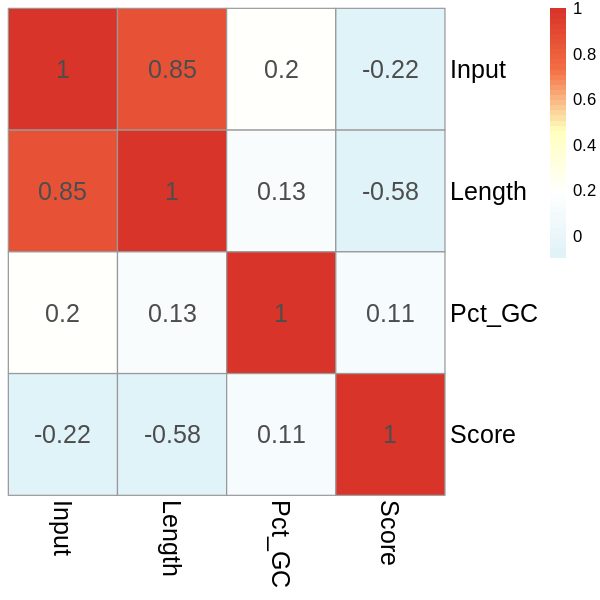

In [15]:
options(repr.plot.height=5, repr.plot.width=5)
mat = scor
pheatmap(mat, 
         color=myColor, breaks=myBreaks,
         display_numbers = round(mat,2), 
         fontsize_number=15, 
         fontsize_row = 15,
         fontsize_col = 15,
         cluster_rows = FALSE, cluster_cols = FALSE)

In [16]:
ASSAY   = "KS91_K562_ASTARRseq"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.chromatin_accessibility.WGS.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_chromatin_access, fpath)